In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Uniform random-number generator

S(n) = a * S(n-1) + c, Mod M

u(n) = S(n) / M

M = 2^31 - 1, a = 16807, c = 0

In [2]:
# Constant
aa = 16807
MM = (2**31)-1
cc = 0.

In [3]:
def uniform_rand(modulus, a, c, seed):
    num=0
    while num < 20000:
        seed = (a * seed + c) % modulus
        quantity = seed / modulus
        num += 1
        yield quantity #Quantity is u(n) = S(n)/M

In [4]:
u = np.zeros(20000)
j=0

for i in uniform_rand(MM,aa,cc,300.):  # seed is 300
        u[j]=i
        j += 1
        
print(len(u)) ; print(u)

20000
[0.00234791 0.46133644 0.68159666 ... 0.71219922 0.93223297 0.03949338]


In [5]:
u = pd.DataFrame(u)
u[1] = u[0]
u[0] = u.index+1
u.head()

,0,1
0,1,0.002348
1,2,0.461336
2,3,0.681597
3,4,0.595040
4,5,0.830171


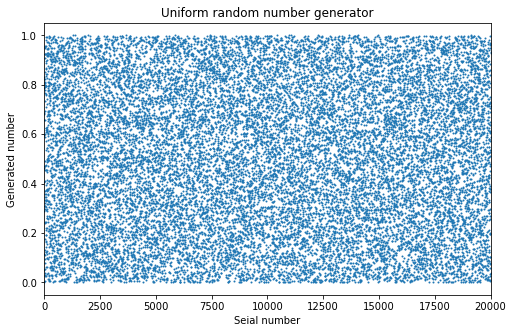

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(x=u[0], y=u[1], s=1)
plt.xlim(0,20000)
plt.xlabel('Seial number')
plt.ylabel('Generated number')
plt.title('Uniform random number generator')
plt.show()

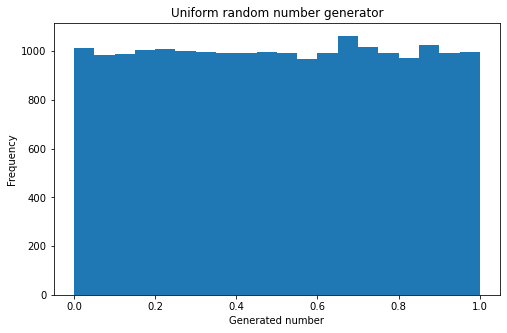

In [7]:
''' Interval h = c*IQR/n**(1/3) '''
''' bins = length/interval (but it should be integer)'''

plt.figure(figsize=(8,5))
plt.hist(u[1], bins=int((max(u[1])-min(u[1]))/(2.6*stats.iqr(u[1], interpolation='midpoint')/20000**(1/3))))
plt.xlabel('Generated number') ; plt.ylabel('Frequency')
plt.title('Uniform random number generator')
plt.show()

# Exponential random number generator

x = -β ln(1-u)

but u is come from uniform random number generator

In [8]:
def exponential_rand(modulus, a, c, seed, beta):
    num=0
    while num < 20000:
        seed = (a * seed + c) % modulus
        quantity = -beta * np.log(1 - seed / modulus)
        num += 1
        yield quantity

In [9]:
ex = np.zeros(20000)
j=0

for i in exponential_rand(MM,aa,cc,300,1.0):  # seed is 300, beta(target mean) is 1.0
    ex[j]=i
    j=j+1
    
print(len(ex)) ; print(ex.mean()) ; print(ex)

20000
0.9995923189800459
[2.35067144e-03 6.18664101e-01 1.14443633e+00 ... 1.24548676e+00
 2.69167946e+00 4.02944018e-02]


In [10]:
ex = pd.DataFrame(ex)
ex[1] = ex[0]
ex[0] = ex.index+1
ex.head()

,0,1
0,1,0.002351
1,2,0.618664
2,3,1.144436
3,4,0.903966
4,5,1.772965


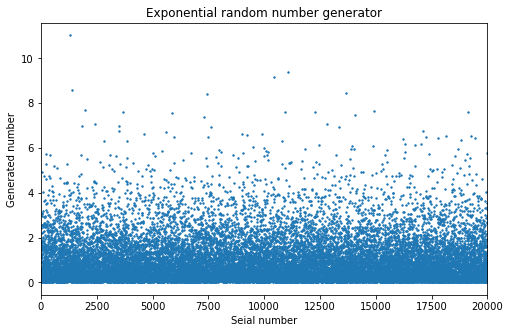

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x=ex[0], y=ex[1], s=2)
plt.xlim(0,20000)
plt.xlabel('Seial number')
plt.ylabel('Generated number')
plt.title('Exponential random number generator')
plt.show()

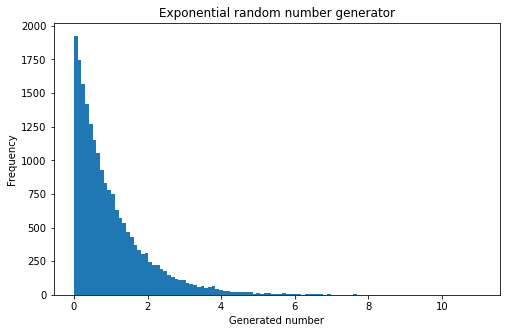

In [12]:
plt.figure(figsize=(8,5))
plt.hist(ex[1], bins=int((max(ex[1])-min(ex[1]))/(2.5*stats.iqr(ex[1], interpolation='midpoint')/20000**(1/3))))
plt.xlabel('Generated number') ; plt.ylabel('Frequency')
plt.title('Exponential random number generator')
plt.show()

# Standard Gaussian random number generator (Box-Muller method)

θ = 2πu1, r = -β ln (1-u2)

where u1 and u2 is independent uniform random number, β is mean and standard deviation.

z1 = r cos(θ), z2 = r sin(θ)

z1 and z2 are a pair of standard gaussian random number where mean = 0 and std. = 1.

Make the mean and standard deviation the target numbers to multiply the target standard deviation and add the target mean.

z = (x - μ) / σ  -> x = σ z + μ


In [13]:
def gaussian_rand_radius(modulus, a, c, seed1):
    num=0
    while num < 20000:
        seed1 = (a * seed1 + c) % modulus
        radius= np.sqrt(-2 * np.log(1-seed1/modulus))     
        num += 1        
        yield radius

def gaussian_rand_angle(modulus, a, c, seed2):
    num=0
    while num < 20000:        
        seed2 = (a * seed2 + c) % modulus
        angle = 2* np.pi * (seed2/modulus)      
        num += 1
        yield angle

In [14]:
rr = np.zeros(20000)
j=0

for i in gaussian_rand_radius(MM,aa,cc,2006):
    rr[j] = i
    j=j+1

print(len(rr)) ; print(rr)

20000
[0.17790021 2.00051114 1.65145863 ... 2.15649118 2.287112   1.82464449]


In [15]:
theta = np.zeros(20000)
j=0

for i in gaussian_rand_angle(MM,aa,cc,3007):
    theta[j] = i
    j=j+1

print(len(theta)) ; print(theta)

20000
[0.14786781 3.35603115 0.66101522 ... 6.08595705 2.70647233 3.70198127]


In [16]:
z1 = np.zeros(20000) ; z2 = np.zeros(20000)
# Before multiplying target standard deviation and add mean, it is standard normal distribution,
# where its mean is zero, and standard deviation is one.
z1, z2 = rr*np.cos(theta), rr*np.sin(theta)

print(z1.mean(), z2.mean())
print(z1.std(), z2.std())

-0.0067112696136365285 0.005767755389146061
1.0107879120719523 1.0074254889768222


In [17]:
''' Set the target mean and standard deviation  for random numbers '''
target_mean = 3.
target_std = 4.

# we use x = σ z + μ for the target values.
x1, x2 = z1*target_std + target_mean, z2*target_std + target_mean

print(x1.mean(), x2.mean())

print(x1.std(), x2.std())

2.9731549215454542 3.0230710215565844
4.043151648287809 4.029701955907289


In [18]:
x1 = pd.DataFrame(x1)
x1[1] = x1[0]
x1[0] = x1.index+1
x1.head()

,0,1
0,1,3.703835
1,2,-4.818766
2,3,8.214443
3,4,3.694994
4,5,9.359561


In [19]:
x2= pd.DataFrame(x2)
x2[1] = x2[0]
x2[0] = x2.index+1
x2.head()

,0,1
0,1,3.104840
1,2,1.297174
2,3,7.055444
3,4,4.109670
4,5,4.258055


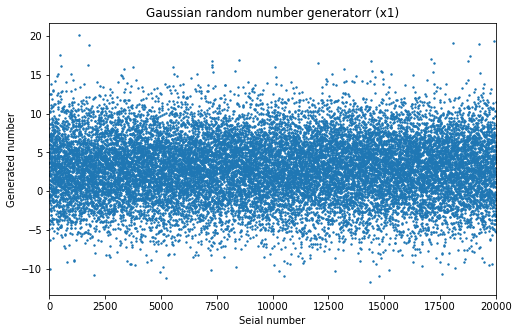

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(x=x1[0], y=x1[1], s=2)
plt.xlim(0,20000)
plt.xlabel('Seial number')
plt.ylabel('Generated number')
plt.title('Gaussian random number generatorr (x1)')
plt.show()

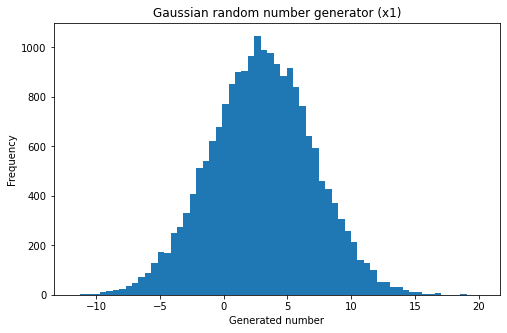

In [21]:
plt.figure(figsize=(8,5))
plt.hist(x1[1], bins=int((max(x1[1])-min(x1[1]))/(2.5*stats.iqr(x1[1], interpolation='midpoint')/20000**(1/3))))
plt.xlabel('Generated number') ; plt.ylabel('Frequency')
plt.title('Gaussian random number generator (x1)')
plt.show()

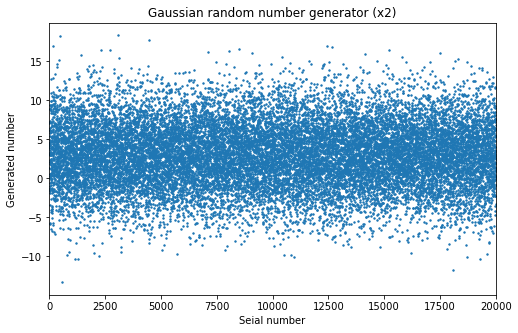

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(x=x2[0], y=x2[1], s=2)
plt.xlim(0,20000)
plt.xlabel('Seial number')
plt.ylabel('Generated number')
plt.title('Gaussian random number generator (x2)')
plt.show()

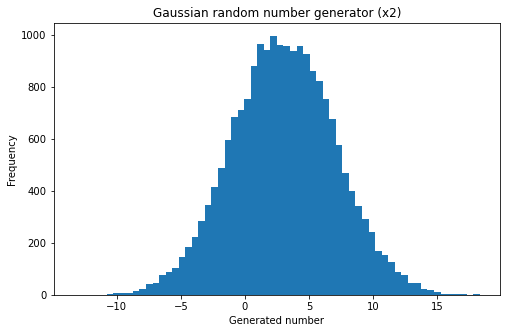

In [23]:
plt.figure(figsize=(8,5))
plt.hist(x2[1], bins=int((max(x2[1])-min(x2[1]))/(2.5*stats.iqr(x2[1], interpolation='midpoint')/20000**(1/3))))
plt.xlabel('Generated number') ; plt.ylabel('Frequency')
plt.title('Gaussian random number generator (x2)')
plt.show()

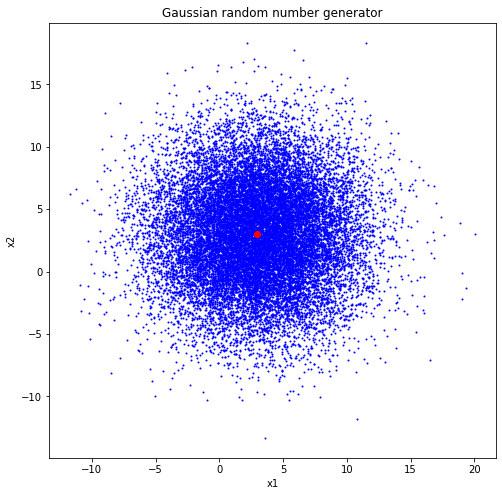

In [24]:
plt.figure(figsize=(8,8))
plt.plot([x1[1].mean()], [x2[1].mean()], 'ro')
plt.scatter(x=x1[1], y=x2[1], s=1, color='b')
plt.xlabel('x1') ; plt.ylabel('x2')
plt.title('Gaussian random number generator')
plt.xl
plt.show()

In [28]:
np.sum([1,2])

3

In [ ]:
np.arr